In [1]:
import geopandas as gpd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
carto = gpd.read_file('data/informacion_censal_por_radio_2010.shp')
carto = carto.to_crs(epsg=5345)

estaciones = gpd.read_file('data/estaciones_de_subte.shp')
estaciones = estaciones.to_crs(epsg=5345)

lineaH = estaciones.loc[estaciones.LINEA == 'H',:]

In [3]:
lineaHbuffer = lineaH.copy()
lineaHbuffer.geometry = lineaHbuffer.geometry.buffer(500)

(4195800.3778905198,
 4198934.4057303276,
 6139968.9591877265,
 6147538.9808109729)

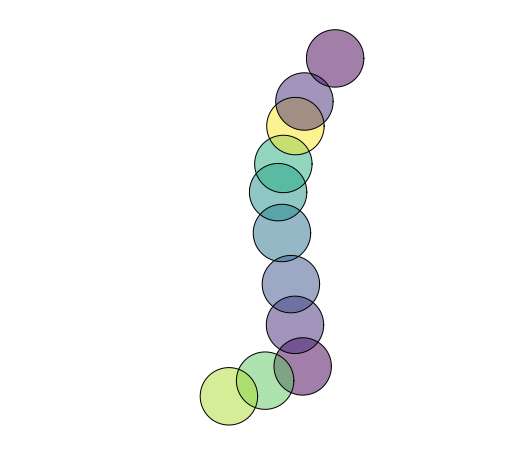

In [4]:
f,ax=plt.subplots(1,figsize=(8,8))
lineaHbuffer.plot(ax=ax)
ax.set_axis_off()
plt.axis('equal')

In [6]:
for estacion in lineaHbuffer.ESTACION:
    carto[estacion] = [carto.geometry.loc[i].intersects(lineaHbuffer.loc[lineaHbuffer.ESTACION==estacion,'geometry'].iloc[0]) for i in carto.index]


Hay radios que tienen repartida su influencia entre 2 o incluso 3 estaciones

(4195800.3778905198,
 4198934.4057303276,
 6139735.2884812653,
 6147550.1079874709)

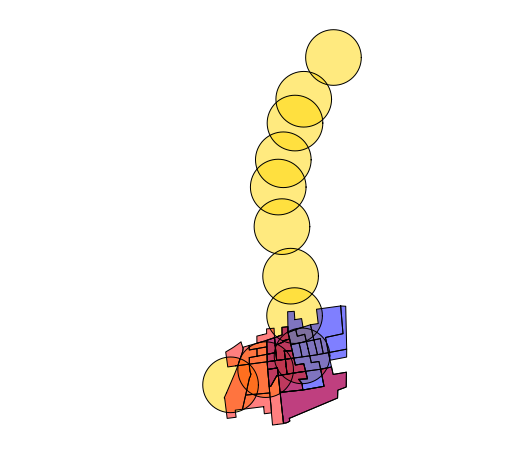

In [7]:
f,ax=plt.subplots(1,figsize=(8,8))
lineaHbuffer.plot(ax=ax,color='gold')
carto.loc[carto['CASEROS'],:].plot(ax=ax,color='blue',alpha=0.5)
carto.loc[carto['PARQUE PATRICIOS'],:].plot(ax=ax,color='red',alpha=0.5)

ax.set_axis_off()
plt.axis('equal')

In [11]:
varBuffers = lineaH.ESTACION.values
carto['q_estaciones'] = carto.loc[:,lineaH.ESTACION.values].sum(axis=1)

In [14]:
carto.q_estaciones.value_counts()

0    3261
1     166
2     125
3       2
Name: q_estaciones, dtype: int64

In [15]:
carto = carto.loc[carto.q_estaciones>0,:]

(4195461.0558560668,
 4199731.1650454244,
 6139665.7963716621,
 6148050.5062043807)

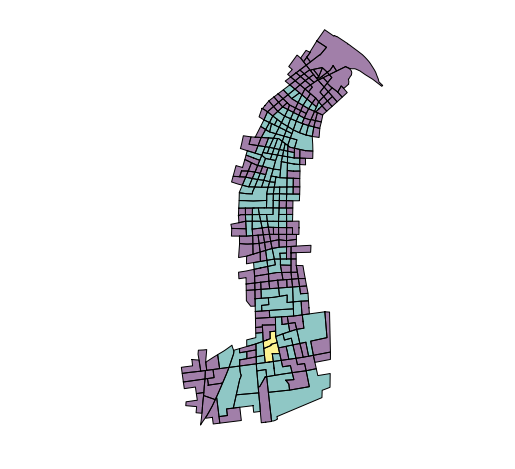

In [16]:
f,ax=plt.subplots(1,figsize=(8,8))
carto.plot(ax=ax,column='q_estaciones')

ax.set_axis_off()
plt.axis('equal')

In [ ]:
#a las que solo tienen uno, asignar la que esta afectada

In [19]:
carto1estacion = carto.loc[carto.q_estaciones==1,:]
carto1estacion['estacionFinal'] = [carto1estacion.loc[i,varBuffers].idxmax() for i in carto1estacion.index]

/home/pipe/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [58]:
#reusltados para estacion con una unica estacion
resultado1estacion = carto1estacion.loc[:,['TOTAL_POB','estacionFinal']].groupby('estacionFinal').sum().reset_index()

In [21]:
carto2estacion = carto.loc[carto.q_estaciones>1,:]


In [22]:
carto2estacion.head()

,COMUNA,CO_FRAC_RA,FRACCION,H_CON_NBI,H_SIN_NBI,ID,RADIO,TOTAL_POB,T_HOGAR,T_MUJER,...,HUMBERTO 1°,VENEZUELA,ONCE - 30 DE DICIEMBRE,CORRIENTES,PARQUE PATRICIOS,HOSPITALES,CÓRDOBA,LAS HERAS,SANTA FE - CARLOS JAUREGUI,q_estaciones
1785,2,2_13_4,13,1.0,554.0,1786,4,1112,555.0,610,...,False,False,False,False,False,False,False,True,True,2
1786,2,2_13_5,13,4.0,643.0,1787,5,1371,647.0,774,...,False,False,False,False,False,False,False,True,True,2
1788,2,2_13_7,13,7.0,627.0,1789,7,1211,634.0,695,...,False,False,False,False,False,False,False,True,True,2
1790,2,2_14_10,14,27.0,510.0,1791,10,1006,537.0,588,...,False,False,False,False,False,False,True,False,True,2
1794,2,2_14_5,14,3.0,496.0,1795,5,1124,499.0,628,...,False,False,False,False,False,False,True,False,True,2


In [39]:
for estacion in lineaHbuffer.ESTACION:
    carto2estacion['dist'+estacion] = [carto2estacion.geometry.loc[i].centroid.distance(estaciones[estaciones.ESTACION==estacion].geometry.iloc[0]) for i in carto2estacion.index]
    

/home/pipe/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [50]:
varDistance = [ u'distCASEROS',
 u'distINCLAN',
 u'distHUMBERTO 1\xb0',
 u'distVENEZUELA',
 u'distONCE - 30 DE DICIEMBRE',
 u'distCORRIENTES',
 u'distPARQUE PATRICIOS',
 u'distHOSPITALES',
 u'distC\xd3RDOBA',
 u'distLAS HERAS',
 u'distSANTA FE - CARLOS JAUREGUI']

In [54]:
carto2estacion['estacionFinal'] = [carto2estacion.loc[i,varDistance].idxmin()[4:] for i in carto2estacion.index]

/home/pipe/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [55]:
carto2estacion.head()

,COMUNA,CO_FRAC_RA,FRACCION,H_CON_NBI,H_SIN_NBI,ID,RADIO,TOTAL_POB,T_HOGAR,T_MUJER,...,distHUMBERTO 1°,distVENEZUELA,distONCE - 30 DE DICIEMBRE,distCORRIENTES,distPARQUE PATRICIOS,distHOSPITALES,distCÓRDOBA,distLAS HERAS,distSANTA FE - CARLOS JAUREGUI,estacionFinal
1785,2,2_13_4,13,1.0,554.0,1786,4,1112,555.0,610,...,3752.993889,2880.037144,2188.949541,1690.030041,5466.767487,5843.489532,1004.355762,589.426372,568.487959,SANTA FE - CARLOS JAUREGUI
1786,2,2_13_5,13,4.0,643.0,1787,5,1371,647.0,774,...,3679.368036,2813.730908,2130.572053,1632.861294,5399.010342,5786.017756,941.802953,540.013407,491.984363,SANTA FE - CARLOS JAUREGUI
1788,2,2_13_7,13,7.0,627.0,1789,7,1211,634.0,695,...,3612.463617,2753.791219,2078.553772,1583.192663,5336.513530,5732.217920,891.189359,521.999496,435.561516,SANTA FE - CARLOS JAUREGUI
1790,2,2_14_10,14,27.0,510.0,1791,10,1006,537.0,588,...,3145.311481,2272.343911,1585.544697,1087.669183,4858.882141,5241.057010,397.323610,1000.387658,90.392487,SANTA FE - CARLOS JAUREGUI
1794,2,2_14_5,14,3.0,496.0,1795,5,1124,499.0,628,...,3280.973688,2411.850555,1728.159492,1230.856446,4997.756769,5383.506795,539.284823,861.371516,98.121594,SANTA FE - CARLOS JAUREGUI


In [63]:
resultado2estaciones = carto2estacion.loc[:,['TOTAL_POB','estacionFinal']].groupby('estacionFinal').sum().reset_index()
resultado2estaciones

,estacionFinal,TOTAL_POB
0,CASEROS,4732
1,CORRIENTES,15665
2,CÓRDOBA,18439
3,HOSPITALES,4149
4,HUMBERTO 1°,6152
5,INCLAN,6387
6,LAS HERAS,713
7,ONCE - 30 DE DICIEMBRE,13792
8,PARQUE PATRICIOS,5098
9,SANTA FE - CARLOS JAUREGUI,20971


In [64]:
resultado = resultado1estacion.merge(resultado2estaciones,on='estacionFinal')
resultado

,estacionFinal,TOTAL_POB_x,TOTAL_POB_y
0,CASEROS,6202,4732
1,CORRIENTES,6589,15665
2,CÓRDOBA,6597,18439
3,HOSPITALES,10598,4149
4,HUMBERTO 1°,15229,6152
5,INCLAN,8350,6387
6,LAS HERAS,29132,713
7,ONCE - 30 DE DICIEMBRE,4079,13792
8,PARQUE PATRICIOS,3271,5098
9,SANTA FE - CARLOS JAUREGUI,17272,20971


In [65]:
resultado['totalPoblacion'] = resultado.TOTAL_POB_x + resultado.TOTAL_POB_y
resultado

,estacionFinal,TOTAL_POB_x,TOTAL_POB_y,totalPoblacion
0,CASEROS,6202,4732,10934
1,CORRIENTES,6589,15665,22254
2,CÓRDOBA,6597,18439,25036
3,HOSPITALES,10598,4149,14747
4,HUMBERTO 1°,15229,6152,21381
5,INCLAN,8350,6387,14737
6,LAS HERAS,29132,713,29845
7,ONCE - 30 DE DICIEMBRE,4079,13792,17871
8,PARQUE PATRICIOS,3271,5098,8369
9,SANTA FE - CARLOS JAUREGUI,17272,20971,38243


In [76]:
resultado.columns = ['ESTACION','poblacion radio unico','poblacion radio compartido','poblacion total']
resultado

,ESTACION,poblacion radio unico,poblacion radio compartido,poblacion total
0,CASEROS,6202,4732,10934
1,CORRIENTES,6589,15665,22254
2,CÓRDOBA,6597,18439,25036
3,HOSPITALES,10598,4149,14747
4,HUMBERTO 1°,15229,6152,21381
5,INCLAN,8350,6387,14737
6,LAS HERAS,29132,713,29845
7,ONCE - 30 DE DICIEMBRE,4079,13792,17871
8,PARQUE PATRICIOS,3271,5098,8369
9,SANTA FE - CARLOS JAUREGUI,17272,20971,38243


In [66]:
cartoH = carto1estacion.append(carto2estacion)
cartoH.head()

,CASEROS,COMUNA,CORRIENTES,CO_FRAC_RA,CÓRDOBA,FRACCION,HOSPITALES,HUMBERTO 1°,H_CON_NBI,H_SIN_NBI,...,distHUMBERTO 1°,distINCLAN,distLAS HERAS,distONCE - 30 DE DICIEMBRE,distPARQUE PATRICIOS,distSANTA FE - CARLOS JAUREGUI,distVENEZUELA,estacionFinal,geometry,q_estaciones
1455,False,14,False,14_31_12,False,31,False,False,1.0,259.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LAS HERAS,"POLYGON ((4198073.514900392 6147138.928105163,...",1
1761,False,2,False,2_10_1,False,10,False,False,5.0,514.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LAS HERAS,"POLYGON ((4197868.421565598 6146838.132635545,...",1
1762,False,2,False,2_10_2,False,10,False,False,2.0,364.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LAS HERAS,"POLYGON ((4197868.421565598 6146838.132635545,...",1
1763,False,2,False,2_10_3,False,10,False,False,1.0,208.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LAS HERAS,"POLYGON ((4198062.600256121 6146984.917668562,...",1
1764,False,2,False,2_10_4,False,10,False,False,1.0,343.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LAS HERAS,"POLYGON ((4198131.583948815 6146897.19361962, ...",1


In [78]:
lineaH = lineaH.merge(resultado.loc[:,['ESTACION','poblacion total']],on='ESTACION')

In [83]:
lineaH['poblacion total'] = lineaH['poblacion total'].map(float)

(4195461.0558560668,
 4199731.1650454244,
 6139665.7963716621,
 6148050.5062043807)

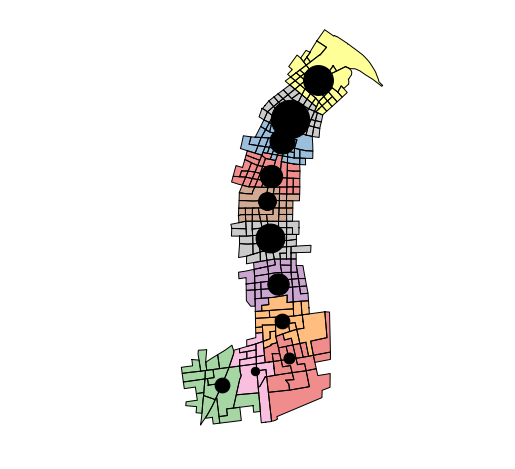

In [91]:
f,ax = plt.subplots(1,figsize=(8,8))
cartoH.plot(column = 'estacionFinal',ax=ax)
#lineaH.plot(ax=ax,markersize=5,color='black')
for i in range(0,len(lineaH)):
    lineaH.geometry.iloc[i:i+1].plot(ax = ax,color='black', markersize = lineaH['poblacion total'].iloc[i]/1000)
ax.set_axis_off()
plt.axis('equal')